# Anomaly Detection Examples with One Class SVM

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P100-102 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

%matplotlib inline

### サンプルデータ生成

それぞれ中心が (0,0) と (3,3) 、標準偏差が1の正規分布による乱数プロットを60個ずつ生成

In [2]:
x = np.vstack([np.random.normal(0, 1, (60, 2)), np.random.normal(3, 1, (60, 2))])

データ全体を平均0、標準偏差1に標準化

In [3]:
sc = StandardScaler()
x = sc.fit_transform(x)

### OneClassSVM のモデル生成

デフォルトのカーネルは'rbf'すなわちガウシアンカーネル

In [4]:
ocsvm= OneClassSVM()
ocsvm.fit(x)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
            kernel='rbf', max_iter=-1, nu=0.5, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

### 結果のプロット

サポートベクトルとなるサンプルを抽出

In [5]:
support_samples = ocsvm.support_

In [6]:
c = np.zeros(120)

In [7]:
c[support_samples] = 1

等高線生成のためのグリッドデータ作成

In [8]:
nbins=100
xi, yi = np.mgrid[-2.5:2.5:nbins*1j, -2.5:2.5:nbins*1j]
xy = np.vstack([xi.flatten(), yi.flatten()])

In [9]:
zi = ocsvm.score_samples(xy.T)
zi = zi.reshape(xi.shape)

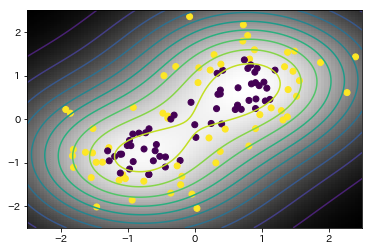

In [10]:
plt.pcolormesh(xi, yi, zi, cmap='gray')
plt.contour(xi, yi, zi, levels=10)
plt.scatter(x[:,0], x[:,1], c=c)
plt.show()